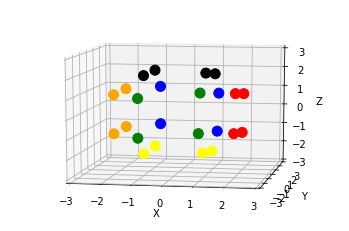

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import matplotlib.colors as mcolors

# Animate a 2 by 2 by 2 Rubik's Cube!

# Uses rotation matrices to rotate a point about an axis through an angle (similar to R, B, U)
def rot3D(point, axis, angle):
  rotationMatrix = np.array(
    [
      [
        [1, 0, 0],
        [0, np.cos(angle), np.sin(angle)],
        [0, -1 * np.sin(angle), np.cos(angle)],
      ],
      [
        [np.cos(angle), 0, -1 * np.sin(angle)],
        [0, 1, 0],
        [np.sin(angle), 0, np.cos(angle)],
      ],
      [
        [np.cos(angle), np.sin(angle), 0],
        [-1 * np.sin(angle), np.cos(angle), 0],
        [0, 0, 1],
      ]
    ]
  )
  return np.matmul(rotationMatrix[axis], point)

# Defines which axis to turn and whether clockwise or counterclockwise
def movesTomoveSeq(moves):
  moveTranslation  = {
    "R" : 1,
    "L" : -1,
    "F" : -2,
    "B" : 2,
    "U" : 3,
    "D" : -3,
  }
  moveSeq = [ [moveTranslation[move[0]], -1] if len(move) == 2 else [moveTranslation[move[0]], 1] for move in moves]
  return moveSeq

# Positions of pieces of the puzzle
corners = [[0, 0, 0] for i in range(24)]
index = 0
for i in [-1, 0, 1]:
  for j in [-2, 2]:
    for k in [-1, 1]:
      for l in [-1, 1]:
        corners[index][i] = j
        corners[index][i + 1] = k
        corners[index][i - 1] = l
        index += 1

# Updates the positions of pieces
def update(i):
  global corners
  j = int((i - i % 20)/20)
  for i in range(len(corners)):
    corner = corners[i]
    if np.sign(moveSeq[j][0]) * corner[abs(moveSeq[j][0]) - 1] > 0:
      corners[i] = rot3D(corner, abs(moveSeq[j][0]) - 1, (np.pi/40) * np.sign(moveSeq[j][0]) * moveSeq[j][1])
  xdata = [corner[0] for corner in corners]
  ydata = [corner[1] for corner in corners]
  zdata = [corner[2] for corner in corners]
  graph._offsets3d = (xdata, ydata, zdata)
  return graph

# These are the moves that we choose to perform on the puzzle
moves = ["R", "R'", "L", "L'", "U", "U'", "D", "D'", "F", "F'", "B", "B'"]
moveSeq = movesTomoveSeq(moves)

# Initializes graph and plots original pieces of the puzzle
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim3d(-3, 3)
ax.set_ylim3d(-3, 3)
ax.set_zlim3d(-3, 3)
colorMap = ['yellow' for i in range(4)] + ['black' for i in range(4)] + ['orange' for i in range(4)] + ['red' for i in range(4)] + ['green' for i in range(4)] + ['blue' for i in range(4)]
graph = ax.scatter([0 for i in range(24)], [0 for i in range(24)], [0 for i in range(24)], s=100, c=colorMap, depthshade=False)
ax.view_init(elev=10, azim=280)

# Run the animation and save it as gif
cube_ani = FuncAnimation(fig, func=update, frames= 20 * len(moveSeq), interval=50)
cube_ani.save('rubikCube.gif', 'pillow')
